In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyecharts import Line,Bar
from itertools import product
%matplotlib inline

# 赌徒输光问题
A、B两人进行“公平”赌博，A、B两人最关心的一个问题：对方什么时候输光？
- 定理：在“公平”的赌博中，任意一个拥有赌本的赌徒和一个拥有无限赌本的赌徒进行长期赌博，那么有限赌本的赌徒输光的概率是100%。
- 推理：在“公平”的赌博中，两个拥有不一样的赌本进行长期赌博，赌本相对少的赌徒输光的概率比另一个赌徒要高。

### 抛硬币游戏。假设A、B两人进行抛硬币，抛到正面，则B输给A 一单位资金，问在进行max_epoch次游戏后，问A、B口袋里各有几钱？ 假定A初始时有init_A_fund资本，B初始时有init_B_fund资本，任意一方输光后游戏停止。

In [3]:
def coin_game(max_epoch, init_A_fund, init_B_fund):
    fund_dict = {}
    fund_dict['A'] = init_A_fund
    fund_dict['B'] = init_B_fund
    
    flag = True
    epoch = 0
    while flag:
        epoch += 1
        
        game = np.random.random()
        if game >= 0.5 :
            fund_dict['A'] += 1
            fund_dict['B'] -= 1
        else:
            fund_dict['A'] -= 1
            fund_dict['B'] += 1
        if fund_dict['A'] ==  0 or fund_dict['B'] ==  0 or epoch == max_epoch:
            flag = False
        
    return fund_dict, epoch
   

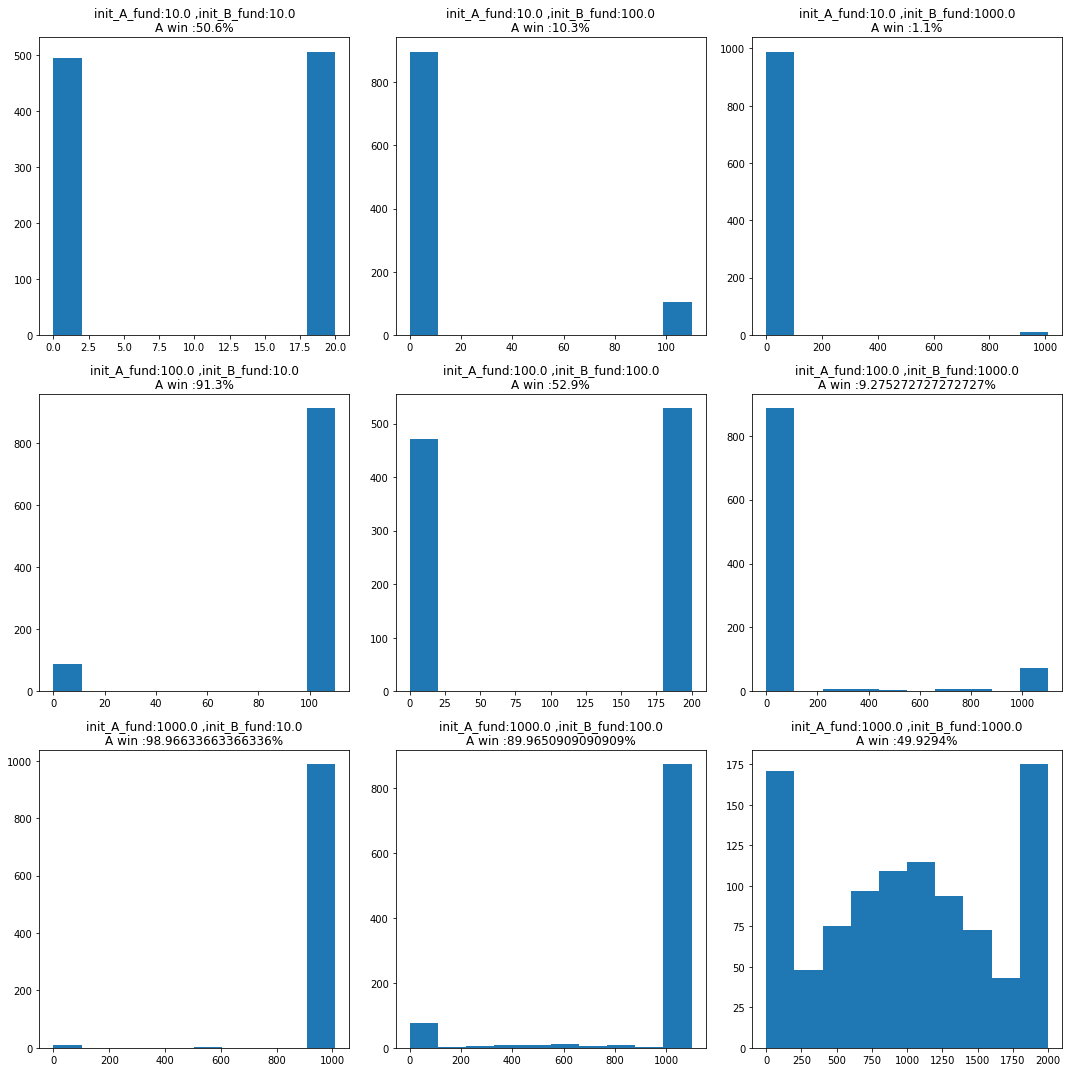

In [4]:
max_epoch = 500000
init_A_fund_list = [1e1,1e2,1e3]
init_B_fund_list = [1e1,1e2,1e3]

fig, ax = plt.subplots(3, 3, figsize = (15,15))

for i, init_A_fund in enumerate(init_A_fund_list):
    for j, init_B_fund in enumerate(init_B_fund_list):
        A_record = []
        B_record = []
        for k in range(1000):  ## 1000场赌局
            result_dict,epoch = coin_game(max_epoch, init_A_fund, init_B_fund)
            A_record.append(result_dict['A'])
            B_record.append(result_dict['B'])
        
        ax[i,j].hist(A_record)
        ax[i,j].set_title("init_A_fund:{} ,init_B_fund:{}\nA win :{}{}".format(init_A_fund,init_B_fund,
                                               100 *np.sum(A_record) / np.sum(B_record + A_record ),"%") )
        
        
        
fig.tight_layout()
plt.savefig('不同初始赌本下的赌徒输光问题.png')
plt.show()        

## 推论：当A、B双方获胜概率相等时，A获得所有资本的概率为a / (a + b)，B获得所有资本的概率为b / (a +b)。 其中a、b分别为A、B的初始赌本。